<a href="https://colab.research.google.com/github/amirhosseinzinati/google-Stock-Prediction-using-RNN/blob/main/Google_stock__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance
!pip install yfinance
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.

In [3]:
#import packages
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler 

# plot stocks
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns


import math
from sklearn.preprocessing import MinMaxScaler 

In [18]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


remove symbol column 

In [17]:
splitFactor = df["splitFactor"].value_counts()
divCash = df["divCash"].value_counts()
print("divCash Count : ",divCash)
print("splitFactor Count : ",splitFactor)

divCash Count :  0.0    1258
Name: divCash, dtype: int64
splitFactor Count :  1.0    1258
Name: splitFactor, dtype: int64


In [20]:
df = df.drop(columns=["symbol","divCash","splitFactor"],axis=1)
#df =df[["date","open","high","low","close","adjClose","volume"]]
df['date'] =pd.to_datetime(df["date"]).dt.date
df.index = pd.DatetimeIndex(df['date'])
data = df.drop(columns=["date"],axis=1)
data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
date,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337


In [21]:
df.shape

(1258, 11)

In [22]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6006ab4190>,
      dtype=object)

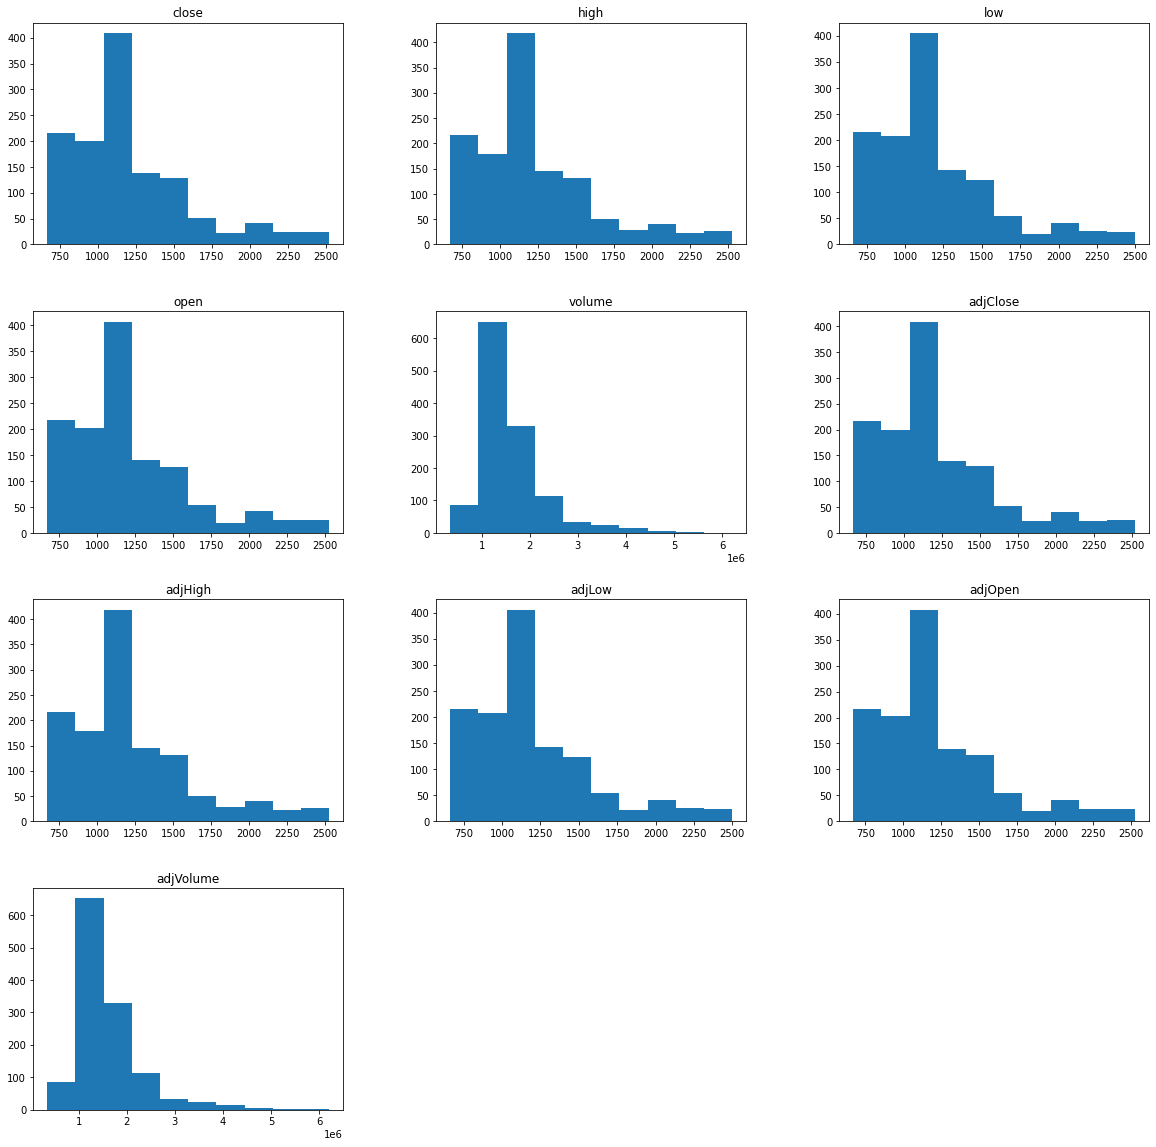

In [23]:
df.hist(figsize=(20,20), grid=False)

Text(0, 0.5, 'Prices ($)')

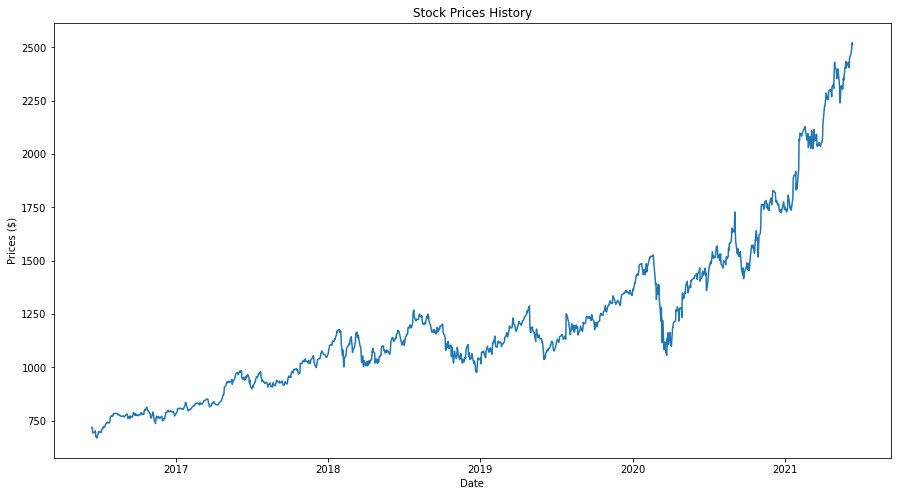

In [24]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [77]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])

n_future_days =30 # numbers Of Days for predict 
n_past_days=120   # Numbers of days that look for predict

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on

#training_data_len = int(np.ceil( len(dataset) * .95 )) ## Base on persent

training_data_len = int(np.ceil( len(dataset) - n_future_days)) ## Base on persent

print("Training Data length is : ",training_data_len)

Training Data length is :  1228


In [78]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)


1258

In [79]:
#Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(n_past_days, len(train_data)):
  x_train.append(train_data[i-n_past_days:i, 0])
  y_train.append(train_data[i, 0])
  if i<= n_past_days:
    print(x_train)
    print(y_train)
    print()

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598,
       0.03966353, 0.04189733, 0.05424261, 0.05644944, 0.05547282,
       0.05661131, 0.05576419, 0.06148899, 0.06124079, 0.0625897 ,
       0.06281632, 0.06290805, 0.06202855, 0.06160769, 0.05874799,
       0.06024259, 0.05894223, 0.05781994, 0.05605555, 0.05601778,
       0.05470124, 0.05457714, 0.05464729, 0.05605555, 0.05440448,
       0.05330377, 0.05423721, 0.05568325, 0.06033432, 0.06048   ,
       0.05776598, 0.04931637, 0.05436671, 0.04933256, 0.05084334,
       0.05584512, 0.05429117, 0.05257535, 0.05565627, 0.05825159,
       0.06418142, 0.06401416, 0.05716706, 0.06191524, 0.0611

In [81]:
# Convert the X_train and y_train dataset to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [82]:
# reshape the data
print(x_train.shape)
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1108, 120)
(1108, 120, 1)


In [83]:
model = Sequential()
model.add(LSTM(128,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 120, 128)          66560     
                                                                 
 dropout_6 (Dropout)         (None, 120, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-tr

In [84]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.1,verbose=1)

Epoch 1/30
32/32 [==============================] - 19s 462ms/step - loss: 0.0147 - val_loss: 0.0110
Epoch 2/30
32/32 [==============================] - 19s 611ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 3/30
32/32 [==============================] - 19s 580ms/step - loss: 9.7430e-04 - val_loss: 0.0015
Epoch 4/30
32/32 [==============================] - 13s 423ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 5/30
32/32 [==============================] - 13s 423ms/step - loss: 8.6308e-04 - val_loss: 0.0035
Epoch 6/30
32/32 [==============================] - 15s 487ms/step - loss: 9.1490e-04 - val_loss: 0.0011
Epoch 7/30
32/32 [==============================] - 13s 423ms/step - loss: 7.9249e-04 - val_loss: 0.0015
Epoch 8/30
32/32 [==============================] - 13s 422ms/step - loss: 8.0161e-04 - val_loss: 0.0019
Epoch 9/30
32/32 [==============================] - 13s 411ms/step - loss: 7.8313e-04 - val_loss: 0.0044
Epoch 10/30
32/32 [==============================] - 16s 490ms/step

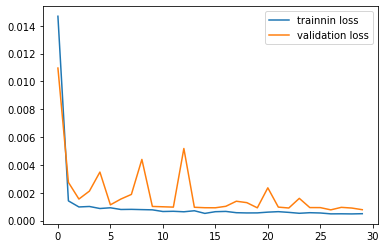

In [85]:
plt.plot(history.history['loss'],label='trainnin loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

In [93]:
## create the testing data set
## create a new array contaning scaled values from index 947 to 1006
test_data = scaled_data[training_data_len - n_past_days : ,:]

#create dataset x_test and y_test 
x_test = []
y_test = dataset[training_data_len :, :]

for i in range (n_past_days, len(test_data)):
  x_test.append(test_data[i-n_past_days:i,0])

In [87]:
# Convert data to numpy array 
x_test = np.array(x_test)

In [88]:
# reshape the data
# reshape the data
print(x_test.shape)
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(30, 120)
(30, 120, 1)


In [89]:
# Get the model Predicted price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 623ms/step


In [90]:
# Get root squared Error (RMSE)  Lower Value is better
rmse = np.sqrt(np.mean(predictions - y_test) **2 )
rmse

30.887682617187497

<ipython-input-91-840f5342af25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


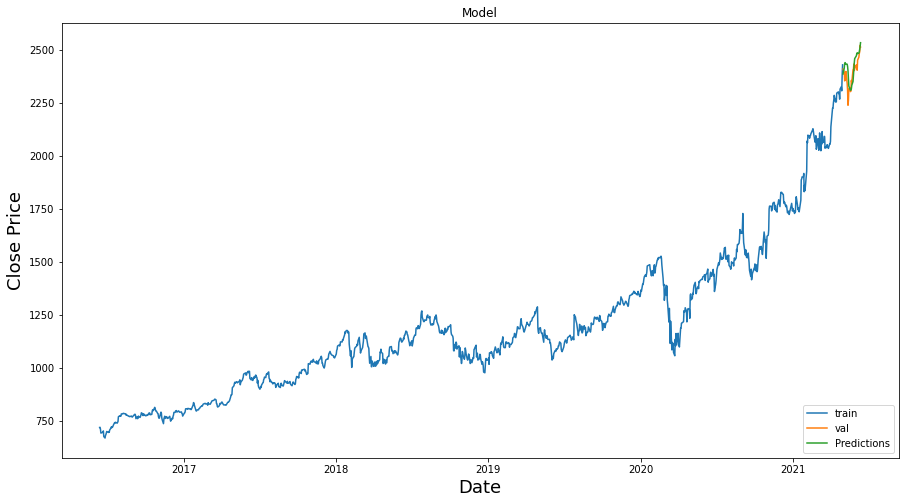

In [91]:
# plot the Data
train = data[:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

# Visualize data
plt.figure(figsize=(15, 8))
plt.title('Model')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['train','val','Predictions'],loc='lower right')
plt.show()